In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\Mall Customer Segmentation Data\Mall_Customers.csv"
data = pd.read_csv(url)
data.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [3]:
# vemos que tenemos variables categoricas. Primero hacemos un resumen y despues pasamos al modelo
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.groupby("Gender").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


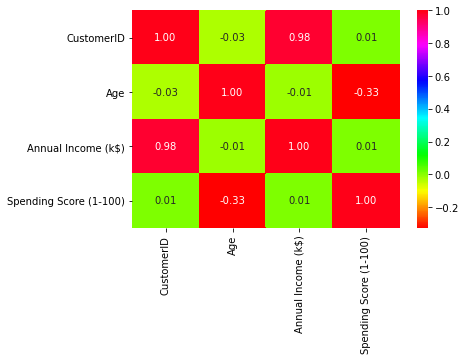

In [6]:
# hacemos un heatmap para ver la corr entre las variables
sns.heatmap(data.corr(),annot=True,cmap="hsv",fmt=".2f")

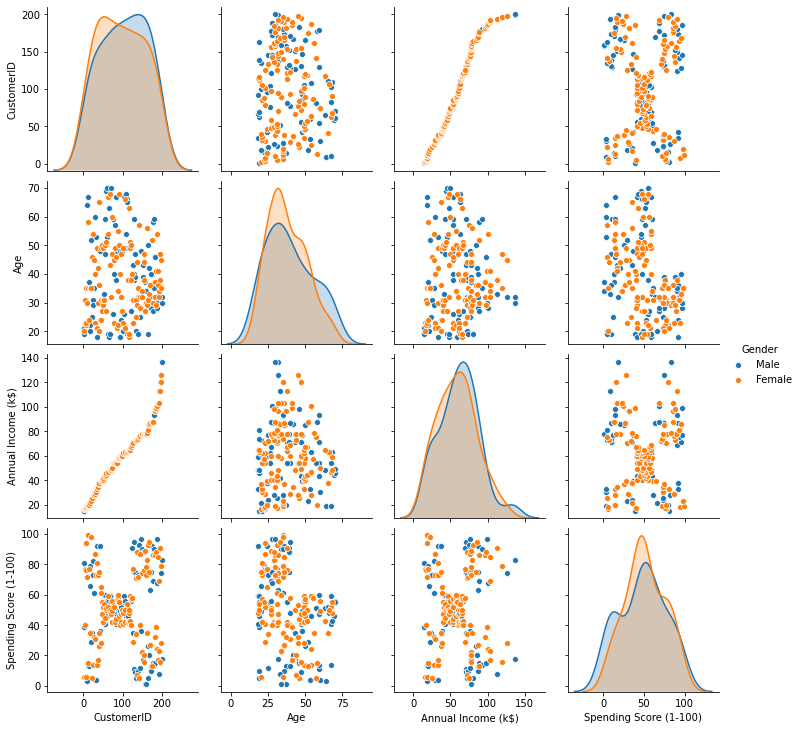

In [8]:
# hacemos una grafica general por genero
sns.pairplot(data,hue="Gender",height=2.5)

Text(0, 0.5, 'distancia')

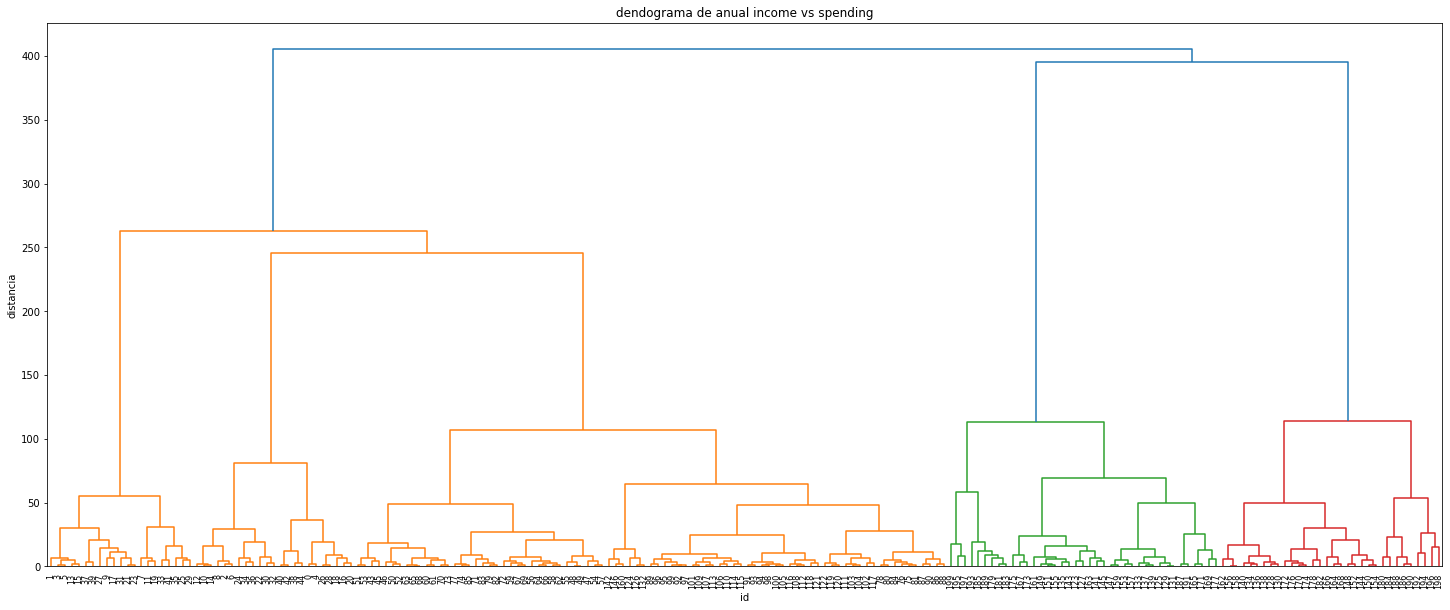

In [9]:
# vamos hacer dendograma, de dos features; en general iremos trabajando con dos porque es mas facil y al final 
# vemos si usamos todas
# podemos pintar un dendograma
from scipy.cluster.hierarchy import dendrogram,linkage
X = data.iloc[:,[3,4]]
Z = linkage(X,"ward")

plt.figure(figsize=(25,10))
dendrogram(Z,leaf_rotation=90.0, leaf_font_size=8.0)
plt.title("dendograma de anual income vs spending")
plt.xlabel("id")
plt.ylabel("distancia")

In [23]:
# podemos usar el metodo de la silueta para encontrar tambien numero cluster(aqui se busca la homogeneidad en
# los grupos)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.5379675585622219)
For n_clusters = 7, silhouette score is 0.5288104473798049)
For n_clusters = 8, silhouette score is 0.4961067740346612)
For n_clusters = 9, silhouette score is 0.4570177118204732)


Text(0, 0.5, 'inertia')

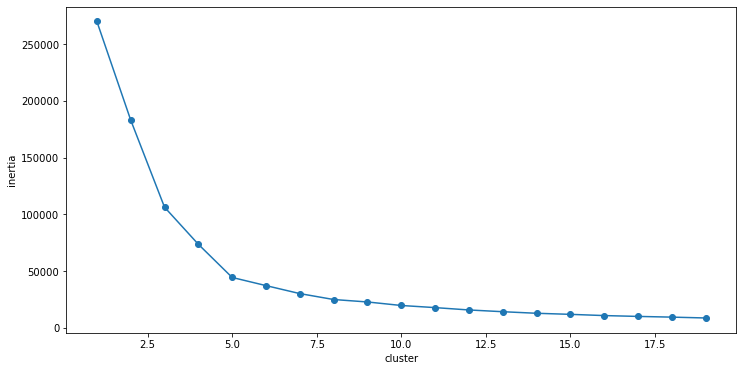

In [10]:
#To implement K-Means clustering, we need to look at the Elbow Method.
#The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed 
# to help to find the appropriate number of clusters in a dataset.
# The following figure demonstrates the elbow method :

# vamos a visualizar la inertia para elegir un numero de cluster correcto (es una metrica)
# fitting multiple k-means algorithms and storing the values in an empty list
from sklearn.cluster import KMeans

SSE =[]
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster,init="k-means++").fit(X)
    SSE.append(kmeans.inertia_)
    
#convertimos los datos en un df y hacemos plot
frame = pd.DataFrame({"cluster":range(1,20),"sse":SSE})
plt.figure(figsize=(12,6))
plt.plot(frame["cluster"],frame["sse"],marker='o')
plt.xlabel("cluster")
plt.ylabel("inertia")

In [13]:
#It is clear from the figure that we should take the number of clusters equal to 5, 
# as the slope of the curve is not steep enough after it.

# # vamos a usar kmeans (usamos init = kmeans++ porque elige los mejores centroides, no de forma aleatoria)

kmeans = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

In [14]:
# podemos visualizar los clusters
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

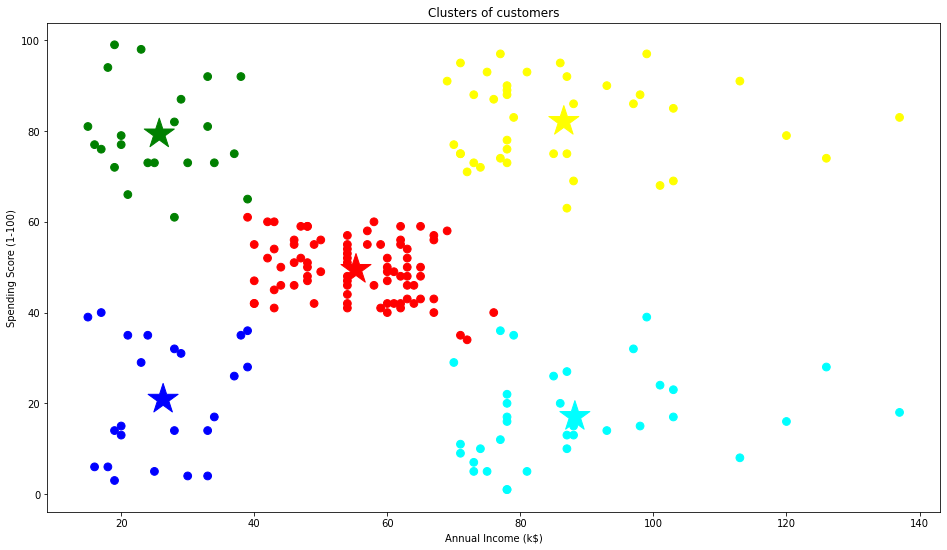

In [20]:
C = kmeans.cluster_centers_
colores = ["red","green","yellow","blue","cyan"]
asignar = []
for rows in y_kmeans:
    asignar.append(colores[rows])

plt.figure(figsize=(16,9))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=asignar,s=60)
plt.scatter(C[:,0],C[:,1],marker='*',c=colores,s=1000)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

https://www.kaggle.com/rajeshjnv/mall-customer-visually-analysis-k-means

In [21]:
# vemos un resumen
data_resumen = data.copy()
data_resumen["cluster"] = y_kmeans

data_resumen.groupby("cluster").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,23.090909,25.272727,25.727273,79.363636
2,162.000000,32.692308,86.538462,82.128205
3,23.000000,45.217391,26.304348,20.913043
4,164.371429,41.114286,88.200000,17.114286
